In [81]:
import pandas as pd
data = pd.read_csv("C:\\Users\\walth\\Music\\Construktor\\Final\\Data\\playground-series-s4e7\\train.csv")

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [83]:
# encoding part
data = pd.get_dummies(data, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

In [84]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,21,1,35.0,0,65101.0,124.0,187,0,False,True,True,False,False,False,True
1,1,43,1,28.0,0,58911.0,26.0,288,1,False,True,False,False,True,False,True
2,2,25,1,14.0,1,38043.0,152.0,254,0,True,False,False,True,False,True,False
3,3,35,1,1.0,0,2630.0,156.0,76,0,True,False,True,False,False,False,True
4,4,36,1,15.0,1,31951.0,152.0,294,0,True,False,True,False,False,True,False


In [85]:
data.drop("id", axis=1, inplace=True)

In [86]:
dic = {"Vehicle_Age_< 1 Year": "Smaller_1", 'Vehicle_Age_1-2 Year': 'Age_1_2', 'Vehicle_Age_> 2 Years': "Age_2"}
data.rename(columns=dic , inplace=True)

In [87]:
random_data = data.sample(frac=0.001)

In [88]:
random_data['Response'].value_counts()

Response
0    10105
1     1400
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
smote = SMOTE()

In [91]:
x_random = random_data.drop('Response', axis=1)
y_random = random_data.Response

In [92]:
X_sampled_random, y_resample_random = smote.fit_resample(x_random, y_random)

In [93]:
y_resample_random.value_counts()

Response
0    10105
1    10105
Name: count, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_sampled_random, y_resample_random, random_state=1, test_size=0.2)

In [95]:
# scaling
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

X_train1_random = scaler.fit_transform(X_train_random)
X_test1_random = scaler.fit_transform(X_test_random)

In [97]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier

In [98]:
rf_model = RandomForestClassifier(max_depth=11)
# model = LGBMClassifier()

rf_model.fit(X_train1_random, y_train_random)

RandomForestClassifier(max_depth=11)

In [99]:
y_pred_rf = rf_model.predict(X_test1_random)

In [100]:
accuracy_score(y_test_random, y_pred_rf)

0.8740722414646215

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<Axes: >

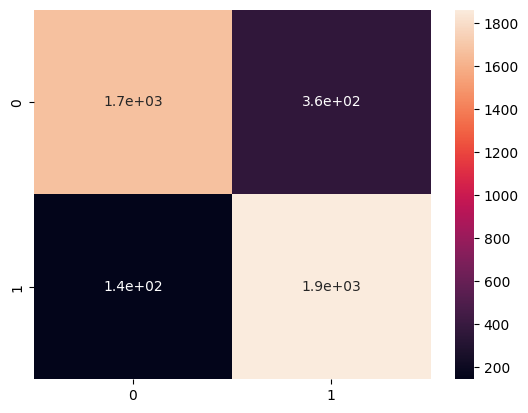

In [102]:
rf_cm = confusion_matrix(y_test_random, y_pred_rf)

import seaborn as sns

sns.heatmap(rf_cm, annot=True)

In [103]:
accuracy_score(y_test_random, y_pred_rf)

0.8740722414646215

In [104]:
cm_rf = classification_report(y_test_random, y_pred_rf)
print(cm_rf)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2036
           1       0.84      0.93      0.88      2006

    accuracy                           0.87      4042
   macro avg       0.88      0.87      0.87      4042
weighted avg       0.88      0.87      0.87      4042



In [105]:
# Training the Random Forest on Whole DataSet

In [106]:
x = data.drop('Response', axis=1)
y = data.Response

In [107]:
X_sampled, y_resample = smote.fit_resample(x, y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_resample, random_state=1, test_size=0.2)

In [109]:
X_train1_full = scaler.fit_transform(X_train)
X_test1_full = scaler.fit_transform(X_test)

In [110]:
# model = RandomForestClassifier(max_depth=11)
lgbmc_model = LGBMClassifier()

lgbmc_model.fit(X_train1_full, y_train)

[LightGBM] [Info] Number of positive: 8072783, number of negative: 8070799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.685155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 16143582, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500061 -> initscore=0.000246
[LightGBM] [Info] Start training from score 0.000246


LGBMClassifier()

In [111]:
y_pred_lgbmc = lgbmc_model.predict(X_test1_full)

<Axes: >

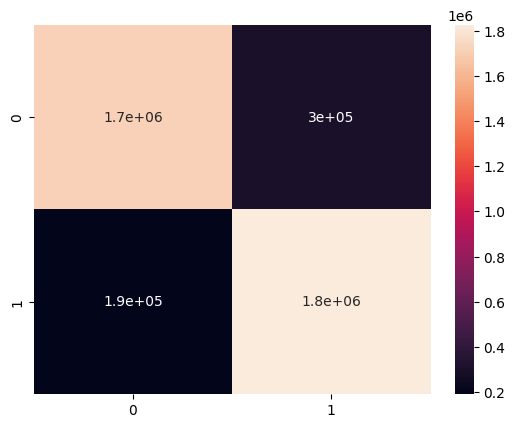

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred_lgbmc)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [113]:
accuracy_score(y_test, y_pred_lgbmc)

0.878364308693782

In [114]:
cm_lgbmc = classification_report(y_test, y_pred_lgbmc)
print(cm_lgbmc)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87   2018940
           1       0.86      0.91      0.88   2016956

    accuracy                           0.88   4035896
   macro avg       0.88      0.88      0.88   4035896
weighted avg       0.88      0.88      0.88   4035896



In [115]:
## using model to make preediction on the test data
test = pd.read_csv("C:\\Users\\walth\\Music\\Construktor\\Final\\Data\\playground-series-s4e7\\test.csv")

test = pd.get_dummies(test, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

In [116]:
dic = {"Vehicle_Age_< 1 Year": "Smaller_1", 'Vehicle_Age_1-2 Year': 'Age_1_2', 'Vehicle_Age_> 2 Years': "Age_2"}
test.rename(columns=dic , inplace=True)

In [117]:
id = test['id']

In [118]:
test.drop('id', axis=1, inplace=True)

In [119]:
test = scaler.fit_transform(test)

In [126]:
model_pred = lgbmc_model.predict(test)
model_proba = lgbmc_model.predict_proba(test)

In [133]:
resp= model_proba[:,1]

In [134]:
resp.shape

(7669866,)

In [135]:
new_data = pd.DataFrame()

In [136]:
new_data['id'] = id
new_data['Response'] = resp

In [137]:
new_data.to_csv("LightGBM.csv", index=False)

In [138]:
new_data.head()

,id,Response
0,11504798,0.036881
1,11504799,0.659493
2,11504800,0.590187
3,11504801,0.000585
4,11504802,0.054912
